# Setup
This notebook uses libsndfile and libfftw, which are C libraries.  Part of the awesomeness of Swift is how easy C interop is. But the libs do need to be installed in our system first.

In [3]:
/*
apt-get install autoconf automake autogen build-essential libasound2-dev \
    libflac-dev libogg-dev libtool libvorbis-dev pkg-config python \
    libsndfile-dev libfftw3-dev
*/

**Note:** The cell below initializes Swift and must be the first cell executed in the notebook.  If you have run other cells already, restart the kernel & run this first.

In [1]:
// %install-location $cwd/swift-install
%install '.package(path: "$cwd/AudioFeature")' AudioFeature

Installing packages:
	.package(path: "/notebooks/AudioFeature")
		AudioFeature
With SwiftPM flags: []
Working in: /tmp/tmps684gizd/swift-install
Completed resolution in 0.68s
Compile Swift Module 'AudioFeature' (1 sources)
Compile Swift Module 'jupyterInstalledPackages' (1 sources)
Linking ./.build/x86_64-unknown-linux/debug/libjupyterInstalledPackages.so
Initializing Swift...
Installation complete!


# What is audio?
When an object moves or exerts force on the air around us, it creates a ripple much like the ripples you see after tossing a rock in a pond.  Our ears percieve these ripples as slight changes in air pressure over time.  Hearing is essentially the process of percieving these fast changes in air pressure, and extracting information from them.  Speaking is more ore less the art of strategically creating ripples with your vocal tract such that people think you know what you're talking about.

So, an audio file boils down to a recording of 1-d array of measurements of change in air pressure over split-second intervals.

(I'm going to us the excellent TensorFlow Speech Commands dataset, which, I've downloaded in a directory called "data")

In [38]:
import AudioFeature

let filename = "data/bird/37b03ab1_nohash_0.wav"
let (samples, fileinfo) = loadSound(filename)
print(fileinfo)

SF_INFO(frames: 16000, samplerate: 16000, channels: 1, format: 65538, sections: 1, seekable: 1)


At its most basic representation, audio is just a 1-d array of floats.  Each element represents a measure of "amplitude".  Amplitude more or less equates to the "loudness" of a sound as humans experience it.

In [39]:
samples[..<10]

▿ 10 elements
  - 0 : 3.0517578e-05
  - 1 : 6.1035156e-05
  - 2 : 6.1035156e-05
  - 3 : 0.0
  - 4 : 3.0517578e-05
  - 5 : 3.0517578e-05
  - 6 : -6.1035156e-05
  - 7 : -0.00021362305
  - 8 : -0.00024414062
  - 9 : -0.0002746582


Using Swift's Python interop we can plot these measurements over time w/ matplotlib.

In [43]:
%include "EnableIPythonDisplay.swift"
let plt = Python.import("matplotlib.pyplot")
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


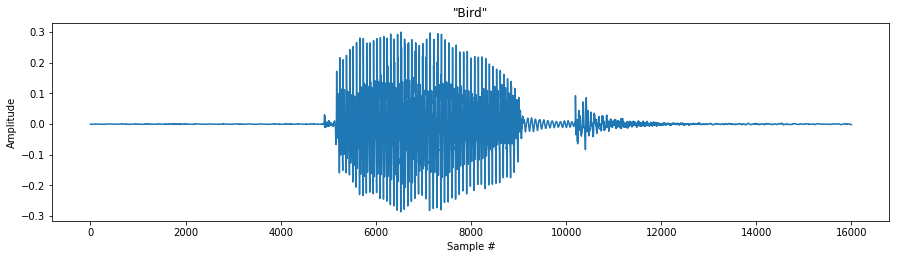

None


In [44]:
let fig = plt.figure(figsize: [15, 8])
let ax1 = fig.add_subplot(211)
ax1.set_title("\"Bird\"")
ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Sample #")

ax1.plot(Array(0..<samples.count), samples)
plt.show()

We can also listen to these measurements with our ears

In [62]:
let ipd = Python.import("IPython.display")

In [63]:
ipd.Audio(samples, rate: fileinfo.samplerate)
// to setup audio forwarding in docker:
// https://devops.datenkollektiv.de/running-a-docker-soundbox-on-mac.html

<IPython.lib.display.Audio object>


It's fascinating that all of the rich, dynamic information we hear from sound, such as pitch and timbre, boils down to just a 1-d series of loudness measurements!

# Spectrograms & MFCC

The most common feature extraction used with speech signals is the *Mel-Frequency Cepstral Coefficients*.  Wikipedia defines MFCC in the following steps:

    1) Take the Fourier transform of (a windowed excerpt of) a signal.
    2) Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows.
    3) Take the logs of the powers at each of the mel frequencies.
    4) Take the discrete cosine transform of the list of mel log powers, as if it were a signal.
    5) The MFCCs are the amplitudes of the resulting spectrum.

The TensorFlow docs include a basic example here: https://www.tensorflow.org/api_docs/python/tf/signal/mfccs_from_log_mel_spectrograms

It would take several additional notebooks to go fully in on what each of these steps do, but here are my notes, (along with translations of the above Python into Swift) for what its worth.

**Fourier Series:** Fourier Analysis stems from the observation that any periodic wave can be expressed as a list of sine waves.  [Jack Schedler](https://jackschaedler.github.io/circles-sines-signals/index.html) has a far better intro into this than I could ever come up with.

**Mels Frequency Spectrum:** Human beings do not hear audio on a linear scale.  For example each octave on a piano is actually the square of the frequency of the previous octave.  They just "sound" equidistant to the human ear.  For this reason, researchers have observed certain "bins" or "Mels" (named after the descoverer of the phenomenon) that "feel" equidistant to the average person.

// TODO: create and display the spectrogram

In [65]:
import TensorFlow

In [67]:
Raw.mfcc

(Function)
